In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [4]:
df.shape

(3588, 18)

In [5]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,bestech altura,sector 79,1.85,8605.0,3,4,3+,11.0,New Property,1946.0,0,1,0,0,0,0,49
1,flat,rof ananda,sector 95,0.46,6319.0,2,2,2,11.0,New Property,809.0,1,0,0,0,0,0,82
2,flat,umang monsoon breeze,sector 78,0.95,5491.0,3,3,2,9.0,Relatively New,1730.0,0,0,0,0,0,1,65
3,flat,tata primanti,sector 72,4.00,13769.0,4,5,2,7.0,Moderately Old,2629.0,0,1,0,0,0,0,38
4,house,emaar mgf marbella,sector 66,9.00,21251.0,4,4,3+,2.0,Relatively New,5200.0,0,1,1,1,0,1,114


In [6]:
train_df = df.drop(columns=['society','price_per_sqft'])

In [7]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 79,1.85,3,4,3+,11.0,New Property,1946.0,0,1,0,0,0,0,49
1,flat,sector 95,0.46,2,2,2,11.0,New Property,809.0,1,0,0,0,0,0,82
2,flat,sector 78,0.95,3,3,2,9.0,Relatively New,1730.0,0,0,0,0,0,1,65
3,flat,sector 72,4.00,4,5,2,7.0,Moderately Old,2629.0,0,1,0,0,0,0,38
4,house,sector 66,9.00,4,4,3+,2.0,Relatively New,5200.0,0,1,1,1,0,1,114


### luxury score

<Axes: ylabel='luxury_score'>

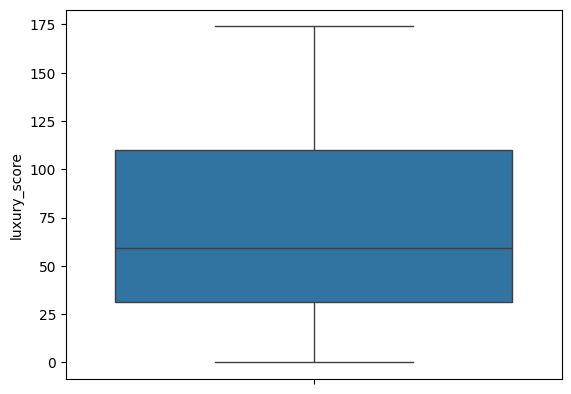

In [8]:
sns.boxplot(df['luxury_score'])

In [9]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins

In [10]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [11]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,flat,sector 79,1.85,3,4,3+,11.0,New Property,1946.0,0,1,0,0,0,0,49,Low
1,flat,sector 95,0.46,2,2,2,11.0,New Property,809.0,1,0,0,0,0,0,82,Medium
2,flat,sector 78,0.95,3,3,2,9.0,Relatively New,1730.0,0,0,0,0,0,1,65,Medium
3,flat,sector 72,4.00,4,5,2,7.0,Moderately Old,2629.0,0,1,0,0,0,0,38,Low
4,house,sector 66,9.00,4,4,3+,2.0,Relatively New,5200.0,0,1,1,1,0,1,114,Medium


### floorNum

<Axes: ylabel='floorNum'>

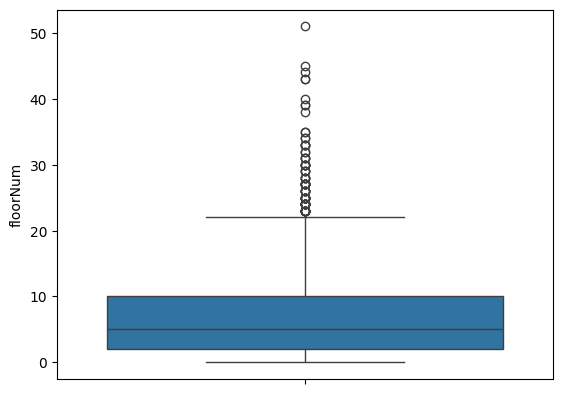

In [12]:
sns.boxplot(df['floorNum'])

In [13]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins

In [14]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [15]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,flat,sector 79,1.85,3,4,3+,11.0,New Property,1946.0,0,1,0,0,0,0,49,Low,High Floor
1,flat,sector 95,0.46,2,2,2,11.0,New Property,809.0,1,0,0,0,0,0,82,Medium,High Floor
2,flat,sector 78,0.95,3,3,2,9.0,Relatively New,1730.0,0,0,0,0,0,1,65,Medium,Mid Floor
3,flat,sector 72,4.00,4,5,2,7.0,Moderately Old,2629.0,0,1,0,0,0,0,38,Low,Mid Floor
4,house,sector 66,9.00,4,4,3+,2.0,Relatively New,5200.0,0,1,1,1,0,1,114,Medium,Low Floor


In [16]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [17]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,sector 79,1.85,3,4,3+,New Property,1946.0,0,1,0,0,0,0,Low,High Floor
1,flat,sector 95,0.46,2,2,2,New Property,809.0,1,0,0,0,0,0,Medium,High Floor
2,flat,sector 78,0.95,3,3,2,Relatively New,1730.0,0,0,0,0,0,1,Medium,Mid Floor
3,flat,sector 72,4.00,4,5,2,Moderately Old,2629.0,0,1,0,0,0,0,Low,Mid Floor
4,house,sector 66,9.00,4,4,3+,Relatively New,5200.0,0,1,1,1,0,1,Medium,Low Floor


In [18]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'new',
       'new sector 2', 'sector 1', 'sector 102', 'sector 103',
       'sector 104', 'sector 105', 'sector 106', 'sector 107',
       'sector 108', 'sector 109', 'sector 10a', 'sector 11',
       'sector 110', 'sector 111', 'sector 112', 'sector 113',
       'sector 12', 'sector 13', 'sector 14', 'sector 15', 'sector 17',
       'sector 17a', 'sector 17b', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 3 phase 2',
       'sector 3 phase 3 extension', 'sector 30', 'sector 31',
       'sector 33', 'sector 36', 'sector 36a', 'sector 37', 'sector 37c',
       'sector 37d', 'sector 38', 'sector 39', 'sector 4', 'sector 40',
       'sector 41', 'sector 43', 'sector 45', 'sector 46', 'sector 47',
       'sector 48', 'sector 49', 'sector 5', 'sector 50', 'sector 51',
       'sector 52', 'sect

In [19]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,91.0,3,4,4.0,1.0,1946.0,0,1,0,0,0,0,1.0,0.0
1,0.0,109.0,2,2,2.0,1.0,809.0,1,0,0,0,0,0,2.0,0.0
2,0.0,90.0,3,3,2.0,3.0,1730.0,0,0,0,0,0,1,2.0,2.0
3,0.0,85.0,4,5,2.0,0.0,2629.0,0,1,0,0,0,0,1.0,2.0
4,1.0,76.0,4,4,4.0,3.0,5200.0,0,1,1,1,0,1,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3583,0.0,75.0,2,2,2.0,1.0,1186.0,0,0,0,0,0,0,2.0,0.0
3584,0.0,13.0,3,4,4.0,3.0,1946.0,0,1,0,0,0,0,2.0,2.0
3585,0.0,82.0,2,2,2.0,3.0,1444.0,0,0,0,0,0,0,2.0,2.0
3586,0.0,96.0,2,2,2.0,3.0,1000.0,0,0,0,0,0,0,1.0,1.0


In [20]:
y_label

0       1.85
1       0.46
2       0.95
3       4.00
4       9.00
        ... 
3583    2.10
3584    1.75
3585    1.10
3586    0.75
3587    1.50
Name: price, Length: 3588, dtype: float64

### Technique 1 - Correlation Analysis

<Axes: >

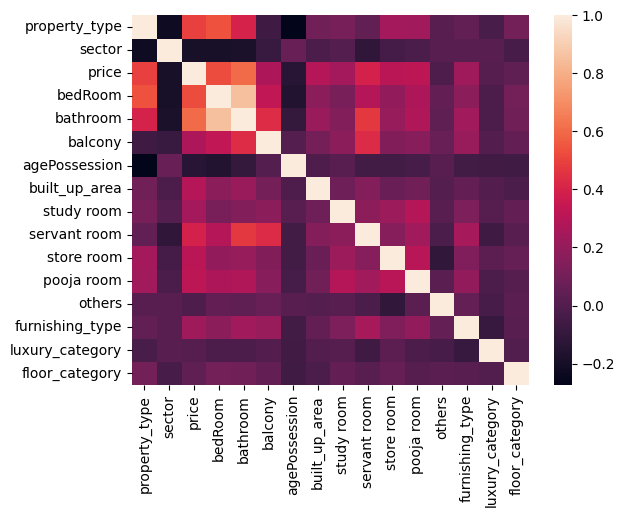

In [21]:
 sns.heatmap(data_label_encoded.corr())

In [22]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,sector,-0.193617
1,price,1.000000
2,bedRoom,0.525640
3,bathroom,0.604208
4,balcony,0.271649
5,agePossession,-0.137598
6,built_up_area,0.291913
7,study room,0.241780
8,servant room,0.394794
9,store room,0.310899


### Technique 2 - Random Forest Feature Importance

In [23]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
6,built_up_area,0.627604
0,property_type,0.121080
1,sector,0.103284
3,bathroom,0.026360
8,servant room,0.024152
2,bedRoom,0.022766
5,agePossession,0.014010
4,balcony,0.011832
12,furnishing_type,0.009934
13,luxury_category,0.008611


### Technique 3 - Gradient Boosting Feature importances

In [24]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
6,built_up_area,0.679153
0,property_type,0.106005
1,sector,0.103607
3,bathroom,0.039829
8,servant room,0.029102
2,bedRoom,0.024001
9,store room,0.008072
5,agePossession,0.004392
12,furnishing_type,0.002308
4,balcony,0.001182


### Technique 4 - Permutation Importance

In [25]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
6,built_up_area,0.748022
0,property_type,0.208412
1,sector,0.162241
8,servant room,0.025247
2,bedRoom,0.017529
3,bathroom,0.015058
4,balcony,0.008503
7,study room,0.002428
5,agePossession,0.002238
14,floor_category,0.000883


### Technique 5 - LASSO

In [26]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5


,feature,lasso_coeff
3,bathroom,1.104166
0,property_type,0.867965
6,built_up_area,0.404184
8,servant room,0.357976
9,store room,0.252266
7,study room,0.213017
12,furnishing_type,0.179045
10,pooja room,0.134561
13,luxury_category,0.093828
4,balcony,0.086638


### Technique 6 - RFE

In [27]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6


,feature,rfe_score
6,built_up_area,0.629972
0,property_type,0.119175
1,sector,0.102279
3,bathroom,0.027938
8,servant room,0.025261
2,bedRoom,0.021677
5,agePossession,0.014968
4,balcony,0.012981
12,furnishing_type,0.009534
13,luxury_category,0.007490


### Technique 7 - Linear Regression Weights

In [29]:
# Train a linear regression model on the label-encoded and standardized training data
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7


,feature,reg_coeffs
3,bathroom,1.172000
0,property_type,0.893817
6,built_up_area,0.410856
8,servant room,0.350755
9,store room,0.253119
7,study room,0.217565
12,furnishing_type,0.186385
10,pooja room,0.139465
13,luxury_category,0.103661
4,balcony,0.097747


### Technique 8 - SHAP

In [31]:
!pip install shap

Defaulting to user installation because normal site-packages is not writeable
  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/545.2 kB ? eta -:--:--
   ---------------------------------------- 545.2/545.2 kB 3.6 MB/s eta 0:00:00
Using cached slicer-0.0.8-py3-none-any.whl (15 kB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1


In [32]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values


array([[-3.30454857e-01, -2.39472589e-01, -1.42126014e-02, ...,
        -4.03278858e-02, -7.91476250e-03,  2.46042972e-02],
       [-2.22108583e-01, -5.18693120e-01, -4.15857056e-02, ...,
        -9.82863790e-03,  6.02918533e-03,  8.94458712e-03],
       [-2.12109462e-01, -3.28582169e-01, -7.76522174e-05, ...,
        -1.55356022e-02, -8.53029983e-03, -1.49830041e-02],
       ...,
       [-2.24121439e-01, -3.08171516e-02, -4.50881987e-02, ...,
        -1.44642657e-02, -4.23436332e-03, -8.58814463e-03],
       [-1.92173283e-01, -2.60139391e-01, -4.16617634e-02, ...,
        -1.33783297e-02, -5.02624782e-03, -3.57304188e-03],
       [-4.57291668e-01, -5.85723196e-01, -2.05486081e-02, ...,
        -1.27734387e-02, -1.29540676e-02, -6.51303758e-03]])

In [33]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
6,built_up_area,1.250785
0,property_type,0.512946
1,sector,0.388328
8,servant room,0.108062
3,bathroom,0.099388
2,bedRoom,0.045417
4,balcony,0.039911
12,furnishing_type,0.030297
5,agePossession,0.027266
14,floor_category,0.023059


In [34]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')

In [35]:
final_fi_df


,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
sector,-0.193617,0.103284,0.103607,0.162241,-0.124005,0.102279,-0.132388,0.388328
bedRoom,0.525640,0.022766,0.024001,0.017529,-0.295757,0.021677,-0.384913,0.045417
bathroom,0.604208,0.026360,0.039829,0.015058,1.104166,0.027938,1.172000,0.099388
balcony,0.271649,0.011832,0.001182,0.008503,0.086638,0.012981,0.097747,0.039911
agePossession,-0.137598,0.014010,0.004392,0.002238,-0.022708,0.014968,-0.032514,0.027266
built_up_area,0.291913,0.627604,0.679153,0.748022,0.404184,0.629972,0.410856,1.250785
study room,0.241780,0.006403,0.000720,0.002428,0.213017,0.006760,0.217565,0.017815
servant room,0.394794,0.024152,0.029102,0.025247,0.357976,0.025261,0.350755,0.108062
store room,0.310899,0.008085,0.008072,-0.010758,0.252266,0.006858,0.253119,0.018406


In [36]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [37]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.712640
sector             0.140738
bathroom           0.033899
servant room       0.033331
bedRoom            0.023457
balcony            0.011492
agePossession      0.010647
furnishing_type    0.007542
study room         0.005364
floor_category     0.005277
store room         0.004739
luxury_category    0.004605
pooja room         0.003936
others             0.002333
dtype: float64

In [38]:
# to drop pooja room, study room, others
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,91.0,3,4,4.0,1.0,1946.0,0,1,0,0,0,0,1.0,0.0
1,0.0,109.0,2,2,2.0,1.0,809.0,1,0,0,0,0,0,2.0,0.0
2,0.0,90.0,3,3,2.0,3.0,1730.0,0,0,0,0,0,1,2.0,2.0
3,0.0,85.0,4,5,2.0,0.0,2629.0,0,1,0,0,0,0,1.0,2.0
4,1.0,76.0,4,4,4.0,3.0,5200.0,0,1,1,1,0,1,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3583,0.0,75.0,2,2,2.0,1.0,1186.0,0,0,0,0,0,0,2.0,0.0
3584,0.0,13.0,3,4,4.0,3.0,1946.0,0,1,0,0,0,0,2.0,2.0
3585,0.0,82.0,2,2,2.0,3.0,1444.0,0,0,0,0,0,0,2.0,2.0
3586,0.0,96.0,2,2,2.0,3.0,1000.0,0,0,0,0,0,0,1.0,1.0


In [39]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [40]:
scores.mean()

0.8078967263340818

In [41]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')

In [42]:
scores.mean()

0.8065750551328013

In [43]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [44]:
export_df.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)

In [45]:
export_df

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price
0,0.0,91.0,3,4,4.0,1.0,1946.0,1,0,0,1.0,0.0,1.85
1,0.0,109.0,2,2,2.0,1.0,809.0,0,0,0,2.0,0.0,0.46
2,0.0,90.0,3,3,2.0,3.0,1730.0,0,0,1,2.0,2.0,0.95
3,0.0,85.0,4,5,2.0,0.0,2629.0,1,0,0,1.0,2.0,4.00
4,1.0,76.0,4,4,4.0,3.0,5200.0,1,1,1,2.0,1.0,9.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3583,0.0,75.0,2,2,2.0,1.0,1186.0,0,0,0,2.0,0.0,2.10
3584,0.0,13.0,3,4,4.0,3.0,1946.0,1,0,0,2.0,2.0,1.75
3585,0.0,82.0,2,2,2.0,3.0,1444.0,0,0,0,2.0,2.0,1.10
3586,0.0,96.0,2,2,2.0,3.0,1000.0,0,0,0,1.0,1.0,0.75
